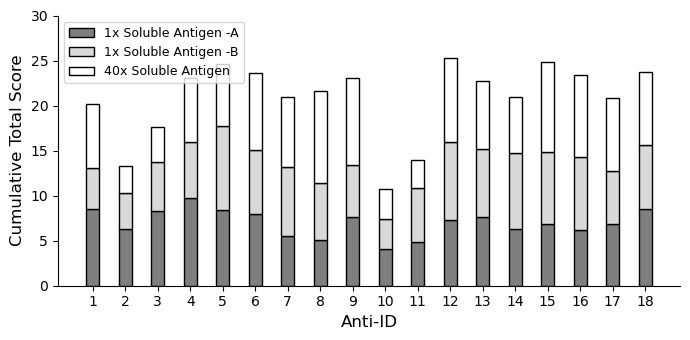

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

mmft = MinMaxScaler().fit_transform

replicate_names = ["1xA","1xB","40x"]
scores = [["Anti-ID","1xA","1xB","40x","Total"]]
concentration_names = ["100x","10x","1x"]
for name in replicate_names:
    scores = [["Anti-ID & Concentration","Soluble Antigen Interference","Matrix Interference","Combination Interference","Soluble Antigen in Matrix Interference","Total"]]
    c = 0
    for concentration in concentration_names:
        for i in range(1,19):
            scores.append(["Anti-ID {0} [{1}]".format(i,concentration)])
        c += 1
    gmm_scores = pd.read_csv("Data/Generic/gmm_generic_individual_scores_{0}.csv".format(name)).values
    for i in range(18):
        for m in range(1,5):
            scores[i+1].append(round(mmft(gmm_scores[:18,m].reshape(-1, 1))[i][0],4))
            scores[i+19].append(round(mmft(gmm_scores[18:36,m].reshape(-1, 1))[i][0],4))
            scores[i+37].append(round(mmft(gmm_scores[36:,m].reshape(-1, 1))[i][0],4))
    c = 1
    for row in scores[1:]:
        scores[c].append(round(sum(row[1:]),4))
        c += 1
    scores = pd.DataFrame(scores)
    scores.to_csv("Data/Generic/generic_individual_norm_{0}.csv".format(name),index=False,header=False)

scores = [["Anti-ID","1xA","1xB","40x","Total"]]
for i in range(1,19):
    scores.append(["Anti-ID {0}".format(i)])
for name in replicate_names:
    gmm_scores = pd.read_csv("Data/Generic/generic_individual_norm_{0}.csv".format(name)).values
    for i in range(18):
        scores[i+1].append(gmm_scores[i][-1]+gmm_scores[i+18][-1]+gmm_scores[i+26][-1])

l = []
for i in range(1,19):
    scores[i].append(sum(scores[i][1:]))
    l.append(str(i))

scores = np.array(scores)
b1 = [float(x) for x in scores[1:,1]]
b2=[float(x)+float(y) for x,y in zip(scores[1:,1],scores[1:,2])]
s2 = [float(x) for x in scores[1:,2]]
s3 = [float(x) for x in scores[1:,3]]
scores_out = pd.DataFrame(scores)
#scores_out.to_csv("Data/Generic/generic_individual_norm.csv",index=False,header=False)


width = 0.4
fig = plt.figure(figsize=(7, 3.5))
fig.set_size_inches(7, 3.5, forward=True)
ax = plt.subplot(1, 1, 1)
ax.bar(l,b1,width,color="#7F7F7F",edgecolor = "black",label="1x Soluble Antigen -A")
ax.bar(l,s2,width,bottom=b1,color="#D9D9D9",edgecolor = "black",label="1x Soluble Antigen -B")
ax.bar(l,s3,width,bottom=[float(x)+float(y) for x,y in zip(scores[1:,1],scores[1:,2])],color="#FFFFFF",edgecolor = "black",label="40x Soluble Antigen")
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_ylabel('Cumulative Total Score',fontsize=12)
ax.set_xlabel('Anti-ID',fontsize=12)
plt.yticks(range(0,35,5),fontsize=10)
plt.xticks(fontsize=10)
plt.legend(fontsize=9)
plt.tight_layout()
#plt.savefig("Plots/Generic/generic_individual_norm.pdf",dpi=300)
plt.show()
###########

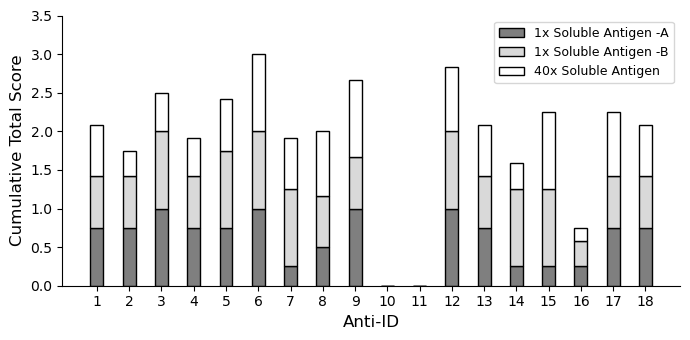

In [3]:

concentration_names = ["100x","10x","1x"]
for name in replicate_names:
    scores = [["Anti-ID","Score"]]
    for i in range(1,19):
        scores.append([f"Anti-ID {i}"])
    gmm_scores = pd.read_csv("Data/Generic/gmm_generic_full_scores_{0}.csv".format(name)).values
    for i in range(18):
        scores[i+1].append(round(mmft(gmm_scores[:,1].reshape(-1, 1))[i][0],4))
    scores = pd.DataFrame(scores)
    scores.to_csv("Data/Generic/generic_full_norm_{0}.csv".format(name),index=False,header=False)

scores = [["Anti-ID","1xA","1xB","40x","Total"]]
for i in range(1,19):
    scores.append(["Anti-ID {0}".format(i)])
for name in replicate_names:
    gmm_scores = pd.read_csv("Data/Generic/generic_full_norm_{0}.csv".format(name)).values

    for i in range(18):
        scores[i+1].append(gmm_scores[i][-1])

l = []
for i in range(1,19):
    scores[i].append(sum(scores[i][1:]))
    l.append(str(i))

scores = np.array(scores)
b1 = [float(x) for x in scores[1:,1]]
b2=[float(x)+float(y) for x,y in zip(scores[1:,1],scores[1:,2])]
s2 = [float(x) for x in scores[1:,2]]
s3 = [float(x) for x in scores[1:,3]]
scores_out = pd.DataFrame(scores)
#scores_out.to_csv("Data/Generic/generic_full_norm.csv",index=False,header=False)

width = 0.4
fig = plt.figure(figsize=(7, 3.5))
fig.set_size_inches(7, 3.5, forward=True)
ax = plt.subplot(1, 1, 1)
ax.bar(l,b1,width,color="#7F7F7F",edgecolor = "black",label="1x Soluble Antigen -A")
ax.bar(l,s2,width,bottom=b1,color="#D9D9D9",edgecolor = "black",label="1x Soluble Antigen -B")
top_bar = ax.bar(l,s3,width,bottom=[float(x)+float(y) for x,y in zip(scores[1:,1],scores[1:,2])],color="#FFFFFF",edgecolor = "black",label="40x Soluble Antigen")
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_ylabel('Cumulative Total Score',fontsize=12)
ax.set_xlabel('Anti-ID',fontsize=12)
plt.yticks(np.arange(0,4,.5),fontsize=10)
plt.xticks(fontsize=10)
plt.legend(fontsize=9)
plt.tight_layout()
#plt.savefig("Plots/Generic/generic_sum_full_norm.pdf",dpi=300)
plt.show()